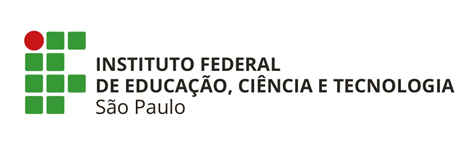

<h1><center>Atividade 3</center></h1>
<br>

<h3><center>INTRODUÇÃO A CIÊNCIA DE DADOS (D1INT)</center></h3>
<br>

<h3><center>Pós Graduação – Ciência de Dados
<br>
Professor: Everton Silva</center></h3>

<br>
<br>

<h4><right>Ede Miranda Júnior – CP3013596
<br>
Eduardo Mendes Oliveira – CP301360X
<br>
Vitor Felipe Facanali Godoy – CP3013669</right></h4>
<br>
<br>

<h3><center>Campinas, São Paulo</center></h3>





#Carregamento das bibliotecas e dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, log_loss, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Semestre 1/PI/archive/heart.csv')
df_copy = pd.read_csv('/content/drive/MyDrive/Semestre 1/PI/archive/heart.csv')

#Entendendo os dados

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Este é um conjunto de dados de fácil entendimento. Mas o significado de algumas colunas não é tão óbvio. Abaixo está listado o significado de cada coluna, e o que cada tipo de dado representa (Essas informações foram obtidas na comunidade do [Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843) e no repositório da [Universidade de Irvine](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)):

1. age - idade em anos

2. sex - sexo (1 = masculino; 0 = feminino)

3. cp - tipo de dor torácica (1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática)

4. trtbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)

5. chol - colestoral LDL em mg / dl

6. fbs - açúcar no sangue em jejum > 120 mg / dl (1 = verdadeiro; 0 = falso)

7. restecg - resultados eletrocardiográficos em repouso (0 = normal; 1 = tendo anormalidade da onda ST-T; 2 = hipertrofia ventricular esquerda)

8. thalachh - frequência cardíaca máxima alcançada

9. exng - angina induzida por exercício (1 = sim; 0 = não)

10. oldpeak - supradesnivelamento de ST induzida por exercícios em relação ao repouso (Mais informações [aqui](https://www.sanarmed.com/supradesnivelamento-de-st-diagnosticos-diferenciais-colunistas))

11. slp - a inclinação do segmento ST de pico do exercício (2 = inclinação ascendente; 1 = plana; 0 = inclinação descendente)

12. caa - número de vasos principais (0-3) coloridos por fluorosopia

13. thal - Talessemia (2 = normal; 1 = defeito corrigido; 3 = defeito reversível; 0 = nulo)

14. output - o atributo previsto - diagnóstico de doença cardíaca (estado da doença angiográfica) (0 = estreitamento do diâmetro menor que 50%; 1 = estreitamento do diâmetro maior que 50%)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Pré-processamento

As colunas foram renomeadas para melhor compreensão

In [ ]:
df.columns = ['idade', 'sexo', 'dor_peito', 'pressao_sanguinea', 'colesterol', 'acucar_sangue', 'eletro', 'freq_cardiaca',
       'angina_induzida_ex', 'suprades_st', 'incli_st', 'num_vasos', 'talassemia', 'saida']

As colunas com valores categóricos tiveram seus dados convertidos para melhor visualização

In [ ]:
df['sexo'][df['sexo'] == 0] = 'feminino'
df['sexo'][df['sexo'] == 1] = 'masculino'

df['dor_peito'][df['dor_peito'] == 0] = 'assintomatica'
df['dor_peito'][df['dor_peito'] == 1] = 'angina tipica'
df['dor_peito'][df['dor_peito'] == 2] = 'angina atipica'
df['dor_peito'][df['dor_peito'] == 3] = 'dor nao aginosa'

df['acucar_sangue'][df['acucar_sangue'] == 0] = 'menor que 120mg/ml'
df['acucar_sangue'][df['acucar_sangue'] == 1] = 'maior que 120mg/ml'

df['eletro'][df['eletro'] == 0] = 'normal'
df['eletro'][df['eletro'] == 1] = 'anormalidade da onda ST-T'
df['eletro'][df['eletro'] == 2] = 'hipertrofia ventricular esquerda'

df['angina_induzida_ex'][df['angina_induzida_ex'] == 0] = 'nao'
df['angina_induzida_ex'][df['angina_induzida_ex'] == 1] = 'sim'

df['incli_st'][df['incli_st'] == 0] = 'inclinação descendente'
df['incli_st'][df['incli_st'] == 1] = 'plana'
df['incli_st'][df['incli_st'] == 2] = 'inclinação ascendente'

df['talassemia'][df['talassemia'] == 0] = ''
df['talassemia'][df['talassemia'] == 1] = 'defeito corrigido'
df['talassemia'][df['talassemia'] == 2] = 'normal'
df['talassemia'][df['talassemia'] == 3] = 'defeito reversível'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main_

O dataframe principal foi divido em dois outros dataframes com base no sexo dos pacientes

In [ ]:
homens = df.loc[df['sexo']=='masculino']
mulheres = df.loc[df['sexo']=='feminino']

#Análise dos dados

Para a análise dos dados foram utilizados gráficos e tabelas.

Para os casos em que houve diagnóstico positivo para doença cardíaca, o número foi maior para homens do que para mulheres

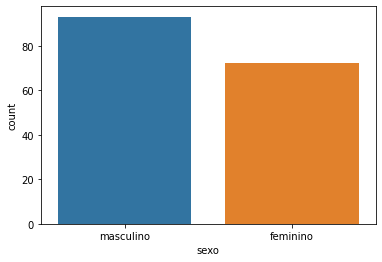

In [ ]:
tendencia_infarto = df.loc[df['saida']==1]
sem_tendencia_infarto = df.loc[df['saida']==1]
sns.countplot(data=tendencia_infarto, x='sexo')

Houve uma incidência maior de casos com diagnóstico positivo para as mulheres entre 50 e 65 anos.

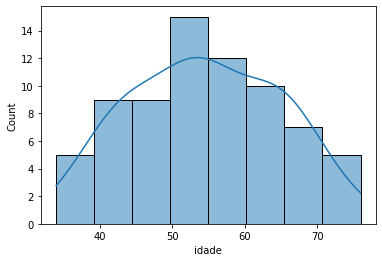

In [ ]:
tendencia_infarto_mulheres = mulheres.loc[mulheres['saida']==1]
sns.histplot(data = tendencia_infarto_mulheres, x='idade', kde=True)

Enquanto que para os homens houve um aumento a partir de 40 anos, e uma queda entre 45 e 50 anos, aumentando novamente a partir de 50 até 60 anos.

Para os homens o ínicio dos casos começam mais cedo, pouco antes dos 30 anos já há casos positivos.

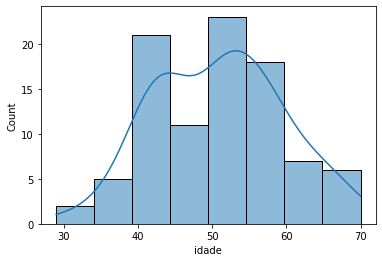

In [ ]:
tendencia_infarto_homens = homens.loc[homens['saida']==1]
sns.histplot(data = tendencia_infarto_homens, x='idade', kde=True)

O tipo de dor torácica frequentemente sentida pelas pessoas com casos positivos para doença cardíaca foi o de "angina atípica".

A angina ocorre quando a carga do trabalho cardíaco e a resultante demanda de oxigênio pelo miocárdico superam a capacidade das artérias coronárias de suprir uma quantidade adequada de sangue oxigenado.

A angina pode ser estável (típica) ou instável (atípica).

Na angina estável, a relação entre carga de trabalho ou demanda e isquemia é, com frequência, relativamente previsível.

Já a angina instável é angina com piora clínica (p. ex., angina em repouso ou aumento da frequência e/ou intensidade dos episódios).

Fonte: [Manual MSD](https://www.msdmanuals.com/pt-br/profissional/doen%C3%A7as-cardiovasculares/doen%C3%A7a-coronariana/angina-de-peito)

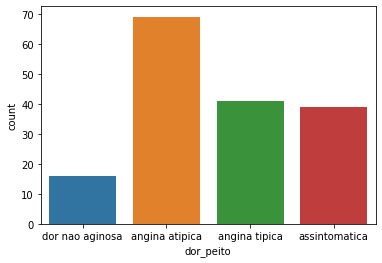

In [ ]:
sns.countplot(data=tendencia_infarto, x='dor_peito')

-----------

Nos casos com diagnóstico de doença cardíaca, as mulheres apresentaram um número mais elevado de colesterol LDL em relação ao homem. Isso se intensifica à partir dos 50 anos.

Em geral, as mulheres têm níveis mais elevados de colesterol HDL do que os homens porque o hormônio sexual feminino estrogênio aumenta esse colesterol bom. Mas na menopausa muitas mulheres experimentam uma mudança em seus níveis de colesterol - o colesterol total e o LDL aumentam e o HDL diminui.

Fonte: [John Hopkins](https://www.hopkinsmedicine.org/health/wellness-and-prevention/why-cholesterol-matters-for-women)

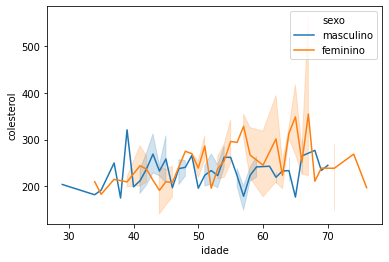

In [ ]:
sns.lineplot(data=tendencia_infarto, x='idade', y='colesterol', hue='sexo')

A média do colesterol LDL nas mulheres foi 25,8 vezes maior que nos homens

In [ ]:
colesterol_grouped = tendencia_infarto.groupby('sexo').mean('colesterol').reset_index()
colesterol_grouped[['sexo','colesterol']]

,sexo,colesterol
0,feminino,256.750000
1,masculino,230.989247


In [ ]:
dif_colesterol = colesterol_grouped.iloc[0]['colesterol']-colesterol_grouped.iloc[1]['colesterol']
print(np.round(dif_colesterol,1))

25.8


Mesmo nos casos que foram negativos para o diagnóstico de doença cardíaca, a diferença da média do colesterol LDL das mulheres foi ainda maior que nos homens.

Isso corrobora com os estudos já existentes que mulheres tem maior tendencia a infartos que homens, pois isso se agrava ao decorrer do tempo devido a menopausa.


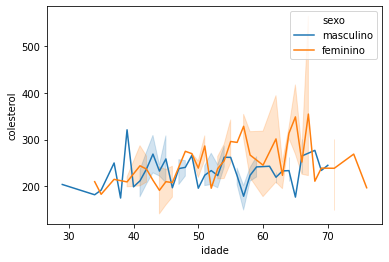

In [ ]:
sns.lineplot(data=sem_tendencia_infarto, x='idade', y='colesterol', hue='sexo')

In [ ]:
sem_tendencia_infarto = df.loc[df['saida']==0]
colesterol_grouped2 = sem_tendencia_infarto.groupby('sexo').mean('colesterol').reset_index()
colesterol_grouped2[['sexo','colesterol']]

,sexo,colesterol
0,feminino,274.958333
1,masculino,246.061404


A diferença da média do colesterol em mulheres para homens foi de 28.9

In [ ]:
dif_colesterol2 = colesterol_grouped2.iloc[0]['colesterol']-colesterol_grouped2.iloc[1]['colesterol']
print(np.round(dif_colesterol2,1))

28.9


Para os casos com diagnóstico positivo a anormalidade da onda ST-T foi a mais frequente.

O segmento ST é um elemento muito importante na avaliação das síndromes coronarianas agudas, uma vez que a oclusão total ou parcial de um vaso coronariano (ou um de seus ramos) implica em redução do fluxo sanguíneo para determinada região do coração, alterando a atividade elétrica dessa região, portanto, gerando alterações no eletrocardiograma.

Fonte: [Sanar](https://www.sanarmed.com/supradesnivelamento-de-st-diagnosticos-diferenciais-colunistas)

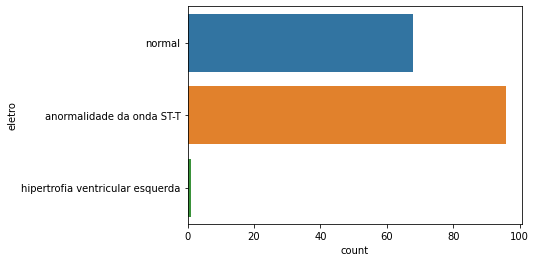

In [ ]:
sns.countplot(data=tendencia_infarto, y='eletro')

No gráfico abaixo há uma comparação entre os pacientes que receberam diagnóstico positivo (1) e negativo (0) com base em sua idade e frequência cardíaca.

Nota-se que há uma queda da frequência cardíaca ao decorrer dos anos para os pacientes com doenças cardíacas.

Uma das possíveis causas da alteração da frequencia cardíaca é a arritmia cardíaca.

As arritmias podem ser benignas e malignas. Indivíduos que apresentam problemas no músculo cardíaco, como infarto, cicatrizes de inflamações, doença nas artérias coronárias e insuficiência cardíaca, estão no grupo de maior risco.

Fonte: [Sobrac](https://sobrac.org/publico-geral/?p=4463)

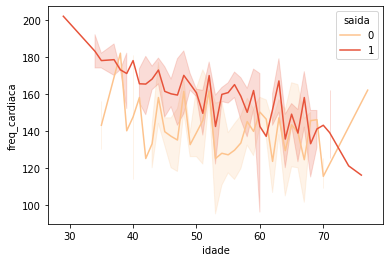

In [ ]:
pal = sns.color_palette('OrRd', 2)
sns.lineplot(data=df, y='freq_cardiaca', x='idade', hue='saida', palette=pal)

Os pacientes com doenças cardíacas apresentam um número menor de vasos visíveis em exames de fluoroscopia

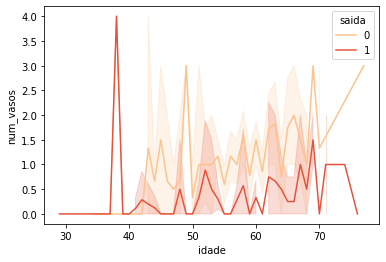

In [ ]:
sns.lineplot(data=df, y='num_vasos', x='idade', hue='saida', palette=pal)

# Criação de um modelo para diagnóstico preventivo

Com o íntuito de desenvolver um sistema capaz de classificar se um indivíduo é propício à ter algum ataque cardíaco, utilizou-se a biblioteca skleanr, a qual possui muitos modelos já existentes de aprendizado de máquina, tendo seu projeto iniciado em 2007 como um projeto Google Summer of Code de David Cournapeau.

Fonte: [Sckit-Learn](https://scikit-learn.org/stable/about.html)

O primeiro passo foi realizar a divisão do dataframe em dois arrays, sendo eles, previsores, o qual possui as entradas do dataset, e as classes, que indica a saida, como comentado anteriormente, além de utilizarmos a função fit_transform, presente na biblioteca StandardScaler, a fim de pré-processar todo os dados.

Após essa etapa, utilizou-se a função train test split para dividir o dataset em duas parte, sendo elas o conjunto de treino, o qual represente 70% do total de amostras, e o conjunto de teste, com 30% do total.

In [ ]:
previsores = df_copy.iloc[:,0:13].values
classe = df_copy.iloc[:,13:14].values

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores) 

X_train, X_test, y_train, y_test = train_test_split(previsores,classe, test_size=0.3, random_state=2)

Com a conclusão das etapas iniciais, gerou-se um modelo com a técnica de regressão logistica, além de utilizar a função cross_validade, a qual realiza a validação cruzada dos dados de treino e teste, aumentando ainda mais os resultados do modelo.

Utilizou-se como métrica de avaliação do modelo, os parâmetro, acurácia, precisão e log loss, exibindo seus valores tanto antes da realização da validação cruzada, quanto após sua utilização.

In [ ]:
def reg(X_train, X_test, y_train, y_test):
    print('Modelo Regressão Logistica')
    regre = LogisticRegression(C=0.1)
    regre.fit(X_train, y_train.ravel())
    previsoes = regre.predict(X_test)
    acuracia = accuracy_score(previsoes, y_test.ravel())
    print('acurácia: ',acuracia)
    log = log_loss(previsoes, y_test.ravel())
    print('log loss ', log)
    precision = precision_score(previsoes, y_test.ravel())
    print('precisão ', precision)

    regre = LogisticRegression(C=0.1)
    cv_results = cross_validate(regre, X_test, y_test.ravel(), scoring=('neg_log_loss', 'accuracy','precision'))
    print('CV_scores:')
    print('   acurácia: ', cv_results['test_accuracy'].max())
    print('   log loss: ', cv_results['test_neg_log_loss'].max())
    print('   precisão: ', cv_results['test_precision'].max())

reg(X_train, X_test, y_train, y_test)

Modelo Regressão Logistica
acurácia:  0.8681318681318682
log loss  4.5545814937778974
precisão  0.96
CV_scores:
   acurácia:  0.8947368421052632
   log loss:  -0.3023668260026987
   precisão:  0.9
